<a href="https://colab.research.google.com/github/LukasBenner/MaschineLearningLectureTasks/blob/master/perceptron/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The perceptron

A simple implementation of a perceptron learning algorithm. A Ccomparison of the perceptron with the logistic regression is given at the end of the notebook.


<a href="https://colab.research.google.com/github/ioskn/mldl_htwg/blob/master/perceptron/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

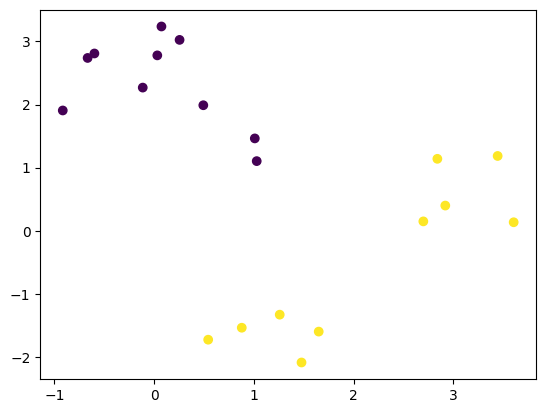

In [24]:
import random
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# training data
random.seed(42)
X, y = make_classification(n_samples=20,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           random_state=random.randint(0,1000),
                           n_clusters_per_class=1,
                           class_sep=1.31)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
n = np.shape(X)[0] # number of data points
y[y==0] = -1


# Plotting of the training data
%matplotlib inline
plt.viridis()
plt.scatter(X[:, 0], X[:, 1], c=y)

In [25]:
def loss(X,y,w,b):
  loss = 0
  for ys,xs in zip(y,X): #some python show off
    loss += max(0, -ys * (np.dot(xs, w) + b))
  return loss

### Calculating the gradient by hand

Only visit wrongly classified points. Take gradient wrt w and b extra.

$$
    \frac{\partial l}{w} = -y \cdot w
$$
$$
    \frac{\partial l}{b} = -y
$$

The gradient descent update formula becomes:

In [26]:
def update_params(X,y,w,b):
  didUpdate = False
  for ys,xs in zip(y,X): #some python show off
    if (ys * (np.dot(xs, w) + b) < 0):
      w = w + ys*xs#eta = 1
      b = b + ys*1
      didUpdate = True
  return w,b, didUpdate

We have a 2-dimensional problem, with coordinates $x_0$ and $x_1$. The line seperating the two classes is given by

$$
    w_0 \cdot x_0  + w_1 \cdot x_1 + b = 0\\
    x_1 = -\frac{w_0}{w_1} x_0 - \frac{b}{w_1}
$$

In [38]:
def plot_data_line(X, y, w, b):
    fig, ax = plt.subplots()

    # Decision boundary
    x0 = np.linspace(min(X[:, 0]), max(X[:, 0]), 10)
    x1 = -w[0] / w[1] * x0 - b / w[1]
    ax.plot(x0, x1, label="Decision Boundary")

    # Scatter plot of data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")

    # Normalize w to unit length
    w_unit = w / np.linalg.norm(w)

    # Compute mean of X to place the arrow
    mean_x, mean_y = np.mean(X, axis=0)

    # Plot the weight vector w
    ax.arrow(mean_x, mean_y, w_unit[0], w_unit[1],
             head_width=0.2, head_length=0.3, fc='green', ec='green', label="w (normalized)")

    # Formatting
    plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    plt.legend()
    plt.show()

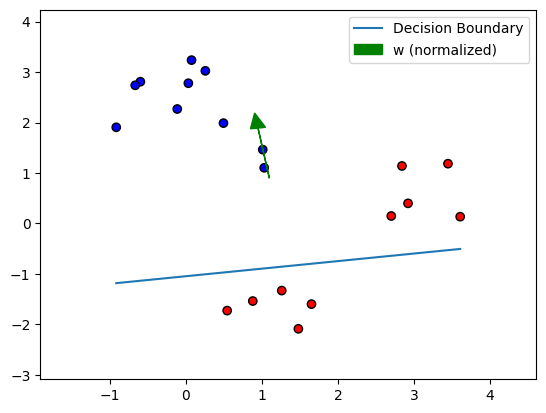

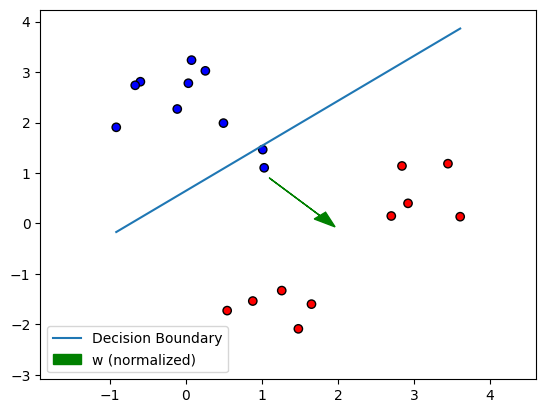

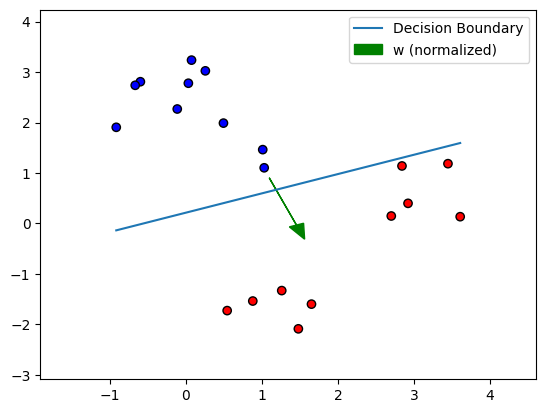

No Update, finished


In [39]:
w = 2*np.random.randn((X.shape[1]))
b = 10*np.random.randn(1)
plot_data_line(X,y,w,b)
for i in range(100):
  w,b,did = update_params(X,y,w,b)
  if did == False:
    print("No Update, finished")
    break
  plot_data_line(X,y,w,b)

In [40]:
print(w)
print(b)

[ 1.51313123 -3.95333287]
[0.8450714]


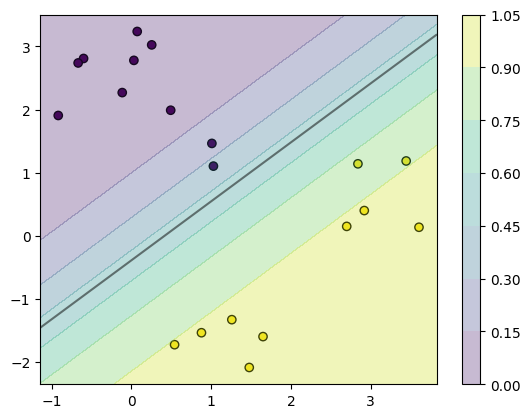

In [31]:
X.shape, y.shape
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
logreg = LogisticRegression()
logreg.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    Z_prob = model.predict_proba(xy)[:, 1].reshape(XX.shape)
    # plot decision boundary and probabilities
    im = ax.contourf(XX, YY, Z_prob, alpha=.3)
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
               linestyles=['-'])
    plt.colorbar(im)
    plt.show()

plot_decision_boundary(X, y, logreg)
